AUTOARIMA

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import arima as pm
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') #style plot (ggplot, Grayscale)

from pylab import rcParams
rcParams['figure.figsize']= 18,8

In [19]:
df = pd.read_excel('/content/drive/MyDrive/Data Scientist/US Superstore data.xls')
off = df.loc[df['Category']=='Office Supplies']
off = off.sort_values('Order Date')
off = off.groupby('Order Date')['Sales'].sum().reset_index()
off = off.set_index('Order Date')
y = off['Sales'].resample('MS').mean()
ar = pd.DataFrame(y)

In [20]:
model = pm.auto_arima(ar['Sales'], d = 1, 
                      MAX_P=2, MAX_Q=3, # maximum p and q
                      seasonal=True,
                      start_P=1, 
                      start_Q=1,
                      D=1, 
                      m=12,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=1.04 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=518.069, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=503.849, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=509.571, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=503.975, Time=0.50 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=505.793, Time=1.20 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=508.187, Time=0.09 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=502.775, Time=0.23 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=508.273, Time=0.03 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=503.713, Time=0.71 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=503.563, Time=0.47 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, T

In [21]:
model = SARIMAX(ar['Sales'],order=(0, 1, 1),
              seasonal_order=(1, 1, 0, 12))
results = model.fit()

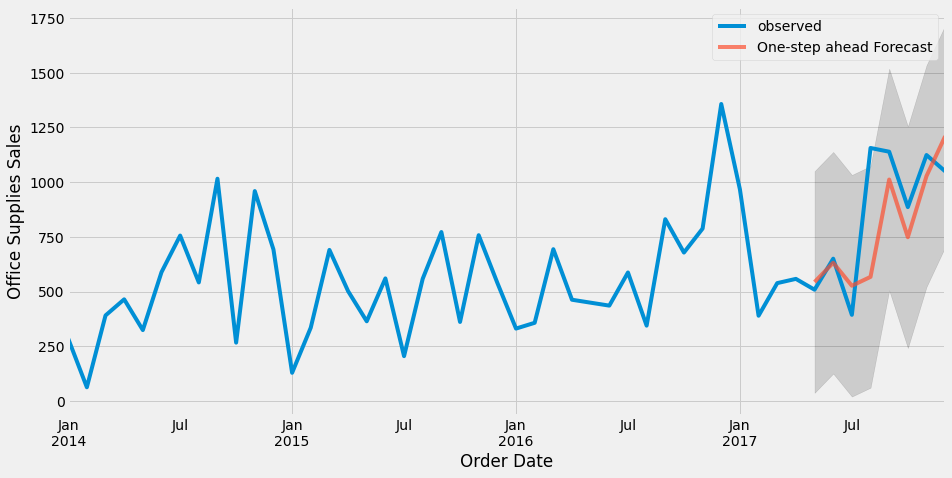

In [22]:
pred = results.get_prediction(start = 40, dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.15)
ax.set_xlabel('Order Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

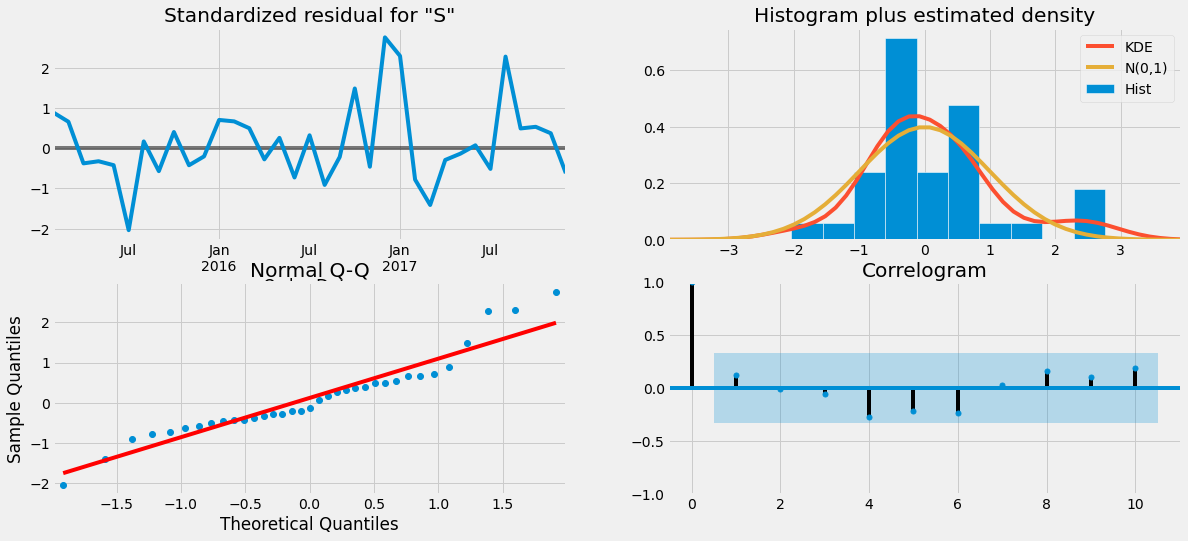

In [28]:
# Plot residual errors
results.plot_diagnostics(figsize = (18, 8))
plt.show()

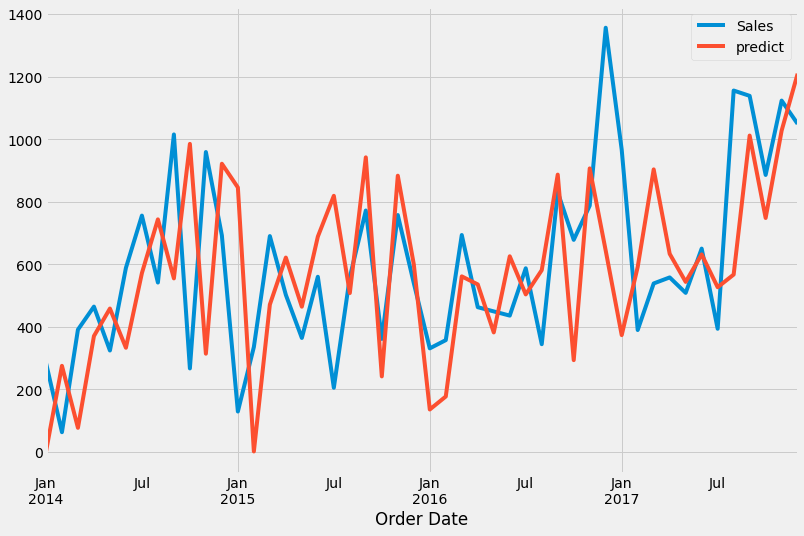

In [24]:
ar['predict']=results.predict(start=0, end=48)
ar[['Sales', 'predict']].plot(figsize=(12,8))

In [17]:
import numpy as np

predicts = results.get_prediction(start='2017-01-01', end='2017-12-01', dynamic=False)
y_hat = predicts.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)

print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 80644.248911
RMSE: 283.979311


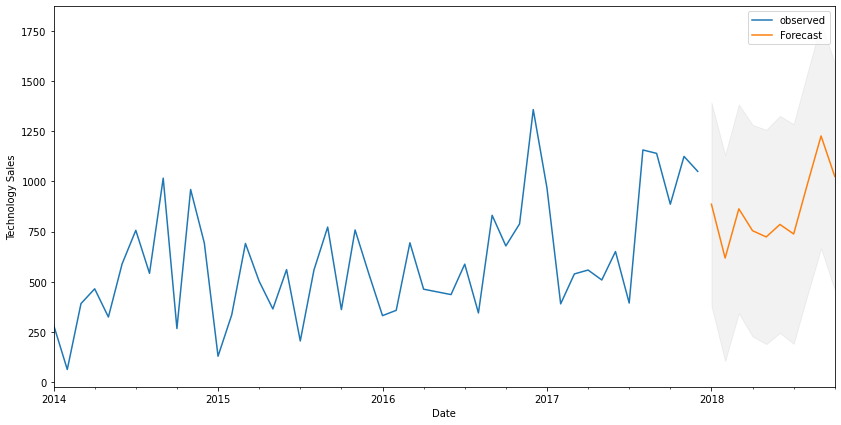

In [15]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.05)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.show()